In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib


In [10]:
import random
def create_transition_df(n_rows=48, n_category=3, n_timeframes=3, stay_prob=0.7):
    """
    Creates a dataframe with transition states
    
    Parameters:
    n_rows (int): Number of rows in dataframe
    n_states (int): Number of possible states (0 to n_states-1)
    n_transitions (int): Number of transition columns to create
    stay_prob (float): Probability of staying in the same state
    
    Returns:
    pd.DataFrame: Dataframe with transition columns
    """
    # Create initial dataframe
    df = pd.DataFrame(np.arange(0, n_rows), columns=['id'])
    
    # Create first transition column with uniform distribution
    df['T1'] = np.random.randint(0, n_category, size=n_rows)
    
    # Create subsequent transition columns
    for i in range(2, n_timeframes + 1):
        col_name = f'T{i}'
        prev_col = f'T{i-1}'
        
        def transition(current_state):
            if random.random() < stay_prob:
                return current_state
            else:
                # Calculate possible moves (-1, +1) but stay within bounds
                possible_moves = []
                if current_state > 0:
                    possible_moves.append(current_state - 1)
                if current_state < n_category - 1:
                    possible_moves.append(current_state + 1)
                # Add small chance of random jump
                if random.random() < 0.2:  # 20% chance of random jump
                    possible_moves = list(range(n_category))
                return random.choice(possible_moves)
        
        df[col_name] = df[prev_col].apply(transition)
    
    return df

In [13]:
import generate_alluvial_matrices
importlib.reload(generate_alluvial_matrices)
from generate_alluvial_matrices import *
df = create_transition_df(100,4,5,.85)
time_cols = list(df.columns)[1:]
direct_trans_matrices, inter_trans_matrices, identity_matrices = generate_alluvial_matrices(df,list(df.columns)[1:])
direct_trans_matrices, inter_trans_matrices

([      0     1     2     3
  0  27.0   1.0   0.0   0.0
  1   4.0  19.0   1.0   0.0
  2   0.0   2.0  27.0   1.0
  3   0.0   0.0   4.0  14.0,
        0     1     2     3
  0  28.0   3.0   0.0   0.0
  1   2.0  19.0   1.0   0.0
  2   0.0   2.0  29.0   1.0
  3   0.0   0.0   3.0  12.0,
        0     1     2    3
  0  26.0   4.0   0.0  0.0
  1   2.0  19.0   3.0  0.0
  2   0.0   2.0  30.0  1.0
  3   0.0   0.0   5.0  8.0,
        0     1     2    3
  0  24.0   4.0   0.0  0.0
  1   1.0  22.0   2.0  0.0
  2   0.0   4.0  30.0  4.0
  3   0.0   1.0   0.0  8.0],
 [[(0,
          0    1    2    3
    0  24.0  3.0  0.0  0.0
    1   4.0  0.0  0.0  0.0
    2   0.0  0.0  0.0  0.0
    3   0.0  0.0  0.0  0.0),
   (1,
         0     1    2    3
    0  1.0   0.0  0.0  0.0
    1  1.0  17.0  1.0  0.0
    2  0.0   2.0  0.0  0.0
    3  0.0   0.0  0.0  0.0),
   (2,
         0    1     2    3
    0  0.0  0.0   0.0  0.0
    1  0.0  0.0   1.0  0.0
    2  0.0  1.0  25.0  1.0
    3  0.0  1.0   3.0  0.0),
   (3,
      

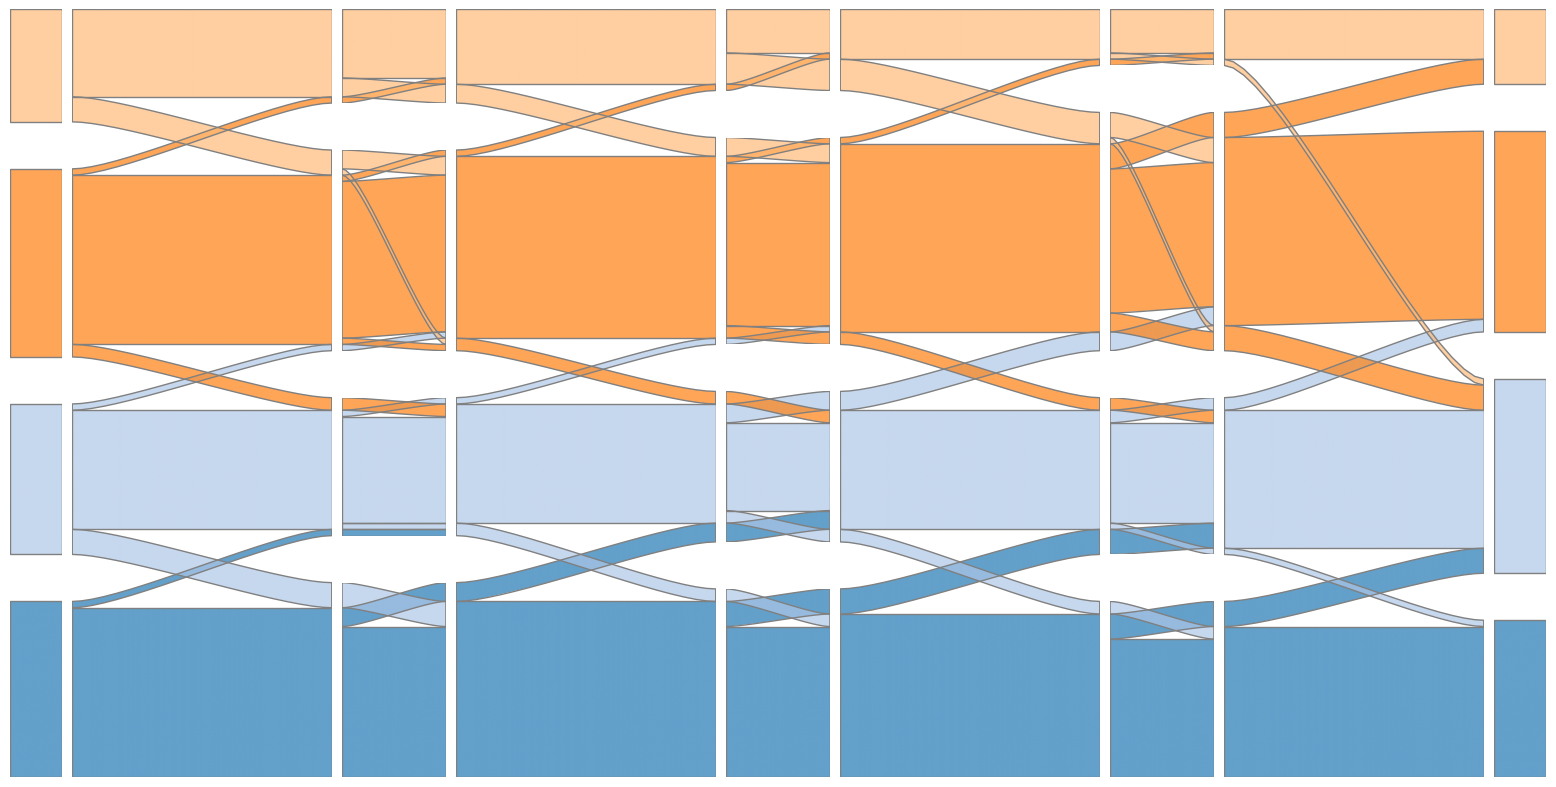

In [21]:
import my_alluvial
importlib.reload(my_alluvial)
from my_alluvial import *
import plot_composite_alluvial

importlib.reload(plot_composite_alluvial)
from plot_composite_alluvial import *
fig, all_axes = plot_composite_alluvial(df,time_cols,direct_trans_matrices,
                            inter_trans_matrices, interp_frac=1
                            )